# 라이브러리 불러오기

In [22]:
import pandas as pd
import numpy as np

# 시각화 
import matplotlib.pylab as plt
import seaborn as sns
from wordcloud import WordCloud
sns.set_style("darkgrid")
plt.rcParams.update({'font.size': 15})

# 텍스트 전처리
import re

# 경고
import warnings
warnings.filterwarnings("ignore")

# 전처리 (Preprocessing)
- 대상 파일: data*.csv(호텔의 기본 정보 크롤링 데이터), review_list*.csv(호텔 리뷰 정보 크롤링 데이터)
- 전처리 항목
> 특수문자 제거 <br> 의미없는 자음, 모음 제거 <br> 이모티콘 제거 <br> 맞춤법 고치기







# 파일 import

In [25]:
df = pd.concat(map(pd.read_csv, ['data0.csv', 'data1.csv','data2.csv', 'data3.csv', 'data4.csv','data5.csv', 'data6.csv', 'data7.csv', 'data8.csv']))
df = df.drop(['Unnamed: 0', 'review'], axis=1)    # 불필요한 열 삭제하기

df.head()

,ID,region,name,star,rating,num_review,basic_info
0,3001626,0,크라운파크호텔 서울,3,4.6,48,"· 비즈니스, 관광, 문화의 중심지 명동에 위치한 크라운 파크 호텔은 서울의 역사와..."
1,3000741,0,써미트 호텔 동대문,3,4.5,209,· 깨끗하고 쾌적했다는 투숙객들의 이용후기가 줄을 잇네요 :)· 오래된 특1급 호텔...
2,1000112780,0,어반스테이 더 남산,0,4.8,241,"· 어반스테이 더 남산은 '비대면 체크인'으로, 안전하게 머물고 삶이 좀 더 가벼워..."
3,3014025,0,영등포 갤럭시 호텔,0,4.1,370,· 갤럭시 관광호텔은 서울시 영등포구 버드 나루로 90번지(당산동)에 위치하여 인천...
4,3000607,0,호텔 더 디자이너스 홍대,0,3.7,803,· 각종 잡지 및 화보 촬영에도 사용되는 아름다운 객실에서 즐기는 특별한 휴식을 즐...


# 결측치 확인 및 제거

In [26]:
# 결측치 확인하기
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2108 entries, 0 to 134
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ID          2108 non-null   int64  
 1   region      2108 non-null   int64  
 2   name        2108 non-null   object 
 3   star        2108 non-null   int64  
 4   rating      2108 non-null   float64
 5   num_review  2108 non-null   int64  
 6   basic_info  2106 non-null   object 
dtypes: float64(1), int64(4), object(2)
memory usage: 131.8+ KB


In [27]:
# 결측치 제거 (basic_info)
df = df.dropna(subset=['basic_info'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2106 entries, 0 to 134
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ID          2106 non-null   int64  
 1   region      2106 non-null   int64  
 2   name        2106 non-null   object 
 3   star        2106 non-null   int64  
 4   rating      2106 non-null   float64
 5   num_review  2106 non-null   int64  
 6   basic_info  2106 non-null   object 
dtypes: float64(1), int64(4), object(2)
memory usage: 131.6+ KB


## 호텔 기본 정보 시각화

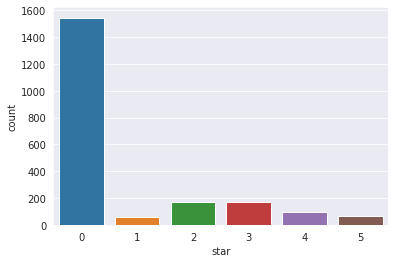

In [10]:
# 호텔 등급(star) 분포 시각화
sns.countplot(df['star']);

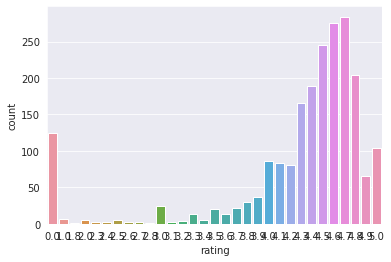

In [11]:
# 호텔 평점(rating) 분포 시각화
sns.countplot(df['rating']);

In [ ]:
# Join한 크롤링 데이터 csv 파일로 내보내기
#df.to_csv('crawling_join.csv', encoding="utf-8-sig")

# 텍스트에 포함되어 있는 특수 문자 제거

In [28]:
# basic_info, review열의 특수 문자 제거
df["basic_info"] = [re.sub('[^A-Za-z0-9가-힣]', ' ', s) for s in df["basic_info"]]
df.head()

,ID,region,name,star,rating,num_review,basic_info
0,3001626,0,크라운파크호텔 서울,3,4.6,48,비즈니스 관광 문화의 중심지 명동에 위치한 크라운 파크 호텔은 서울의 역사와...
1,3000741,0,써미트 호텔 동대문,3,4.5,209,깨끗하고 쾌적했다는 투숙객들의 이용후기가 줄을 잇네요 오래된 특1급 호텔...
2,1000112780,0,어반스테이 더 남산,0,4.8,241,어반스테이 더 남산은 비대면 체크인 으로 안전하게 머물고 삶이 좀 더 가벼워...
3,3014025,0,영등포 갤럭시 호텔,0,4.1,370,갤럭시 관광호텔은 서울시 영등포구 버드 나루로 90번지 당산동 에 위치하여 인천...
4,3000607,0,호텔 더 디자이너스 홍대,0,3.7,803,각종 잡지 및 화보 촬영에도 사용되는 아름다운 객실에서 즐기는 특별한 휴식을 즐...


In [30]:
# bash 셸로 명령어 입력하여 라이브러리 설치하기

%%bash
apt-get update
apt-get install g++ openjdk-8-jdk python-dev python3-dev
pip3 install JPype1
pip3 install konlpy

Get:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:3 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ Packages [73.9 kB]
Ign:4 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Get:6 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:7 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Hit:8 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:9 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:11 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:13 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Get:14 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]
Ge

In [31]:
# JAVA_HOME 환경변수 설정하기

%env JAVA_HOME "/usr/lib/jvm/java-8-openjdk-amd64"

env: JAVA_HOME="/usr/lib/jvm/java-8-openjdk-amd64"


In [74]:
# okt 사용해보기 from konlpy
from konlpy.tag import Okt

okt=Okt()

In [43]:
df['keywords'] = df['basic_info'].apply(okt.nouns)

In [44]:
df.head()

,ID,region,name,star,rating,num_review,basic_info,keywords
0,3001626,0,크라운파크호텔 서울,3,4.6,48,비즈니스 관광 문화의 중심지 명동에 위치한 크라운 파크 호텔은 서울의 역사와...,"[비즈니스, 관광, 문화, 중심지, 명동, 위치, 크라운, 파크, 호텔, 서울, 역..."
1,3000741,0,써미트 호텔 동대문,3,4.5,209,깨끗하고 쾌적했다는 투숙객들의 이용후기가 줄을 잇네요 오래된 특1급 호텔...,"[투숙, 객, 이용, 후기, 줄, 특, 급, 호텔, 룸, 컨디션, 거, 여행, 비즈..."
2,1000112780,0,어반스테이 더 남산,0,4.8,241,어반스테이 더 남산은 비대면 체크인 으로 안전하게 머물고 삶이 좀 더 가벼워...,"[어, 스테이, 더, 남산, 비대, 체크, 삶, 좀, 더, 수, 공간, 제공, 등록..."
3,3014025,0,영등포 갤럭시 호텔,0,4.1,370,갤럭시 관광호텔은 서울시 영등포구 버드 나루로 90번지 당산동 에 위치하여 인천...,"[갤럭시, 관광, 호텔, 서울시, 영등포구, 버드, 나루, 번지, 당산동, 위치, ..."
4,3000607,0,호텔 더 디자이너스 홍대,0,3.7,803,각종 잡지 및 화보 촬영에도 사용되는 아름다운 객실에서 즐기는 특별한 휴식을 즐...,"[각종, 잡지, 및, 화보, 촬영, 사용, 객실, 휴식, 천연, 라텍스, 침대, 준..."


In [95]:
def text_preprocessing(text_list):
    
    stopwords = ['보다', '에서', '보다', '되다', '에는', '되는', '에도'] # 불용어 설정
    tokenizer = Okt() # 형태소 분석기 
    token_list = []
    
    for text in text_list:
        txt = re.sub('[^가-힣a-z]', ' ', text) # 한글과 영어 소문자만 남기고 다른 글자 모두 제거
        tokens = tokenizer.morphs(txt) # 형태소 분석
        tokens = [t for t in tokens if t not in stopwords or type(t) != float] # 형태소 분석 결과 중 stopwords에 해당하지 않는 것만 추출
        tokens = [ token for token in tokens if len(token) > 1 ] # 한 글자인 단어는 제외
        token_list.append(tokens)
        
    return token_list, tokenizer


df['keywords'], okt = text_preprocessing(df['basic_info']) 

In [96]:
df.head()

,ID,region,name,star,rating,num_review,basic_info,keywords
0,3001626,0,크라운파크호텔 서울,3,4.6,48,비즈니스 관광 문화의 중심지 명동에 위치한 크라운 파크 호텔은 서울의 역사와...,"[비즈니스, 관광, 문화, 중심지, 명동, 위치, 크라운, 파크, 호텔, 서울, 역..."
1,3000741,0,써미트 호텔 동대문,3,4.5,209,깨끗하고 쾌적했다는 투숙객들의 이용후기가 줄을 잇네요 오래된 특1급 호텔...,"[깨끗하고, 쾌적했다는, 투숙, 이용, 후기, 잇네요, 오래된, 호텔, 보다, 컨디..."
2,1000112780,0,어반스테이 더 남산,0,4.8,241,어반스테이 더 남산은 비대면 체크인 으로 안전하게 머물고 삶이 좀 더 가벼워...,"[스테이, 남산, 비대, 체크, 으로, 안전하게, 머물고, 가벼워, 있는, 공간, ..."
3,3014025,0,영등포 갤럭시 호텔,0,4.1,370,갤럭시 관광호텔은 서울시 영등포구 버드 나루로 90번지 당산동 에 위치하여 인천...,"[갤럭시, 관광, 호텔, 서울시, 영등포구, 버드, 나루, 번지, 당산동, 위치, ..."
4,3000607,0,호텔 더 디자이너스 홍대,0,3.7,803,각종 잡지 및 화보 촬영에도 사용되는 아름다운 객실에서 즐기는 특별한 휴식을 즐...,"[각종, 잡지, 화보, 촬영, 에도, 사용, 되는, 아름다운, 객실, 에서, 즐기는..."


# 전처리한 basic_info 파일 내보내기

In [97]:
df.to_excel('info.xlsx')

In [98]:
df.to_csv('info.csv')